In [1]:
import os
import re

import numpy as np
import torch

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

sns.set_context('paper', font_scale=2, rc={'lines.linewidth': 2})
sns.set_style(style='whitegrid')

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

In [2]:
def get_cers(filepath):
    if filepath.endswith('pth'):
        ckpt = torch.load(filepath, map_location={'cuda:0': 'cpu'})
        return ckpt['metrics']['cer'], ckpt['val_metrics']['cer']
    
    with open(filepath) as f:
        log = f.read()
        return [float(v) for v in re.findall(r'Training\s+Summary(?:.*?)cer\s+([0-9]+\.[0-9]+)', log)],\
               [float(v) for v in re.findall(r'Validation\s+Summary(?:.*?)cer\s+([0-9]+\.[0-9]+)', log)]

In [3]:
finetune_cers = get_cers('../../results/pt_BR-finetune.log')
freeze_cers = get_cers('../../results/pt_BR-finetune-freeze.pth')
scratch_cers = get_cers('../../results/pt_BR-from_scratch.pth')
lowerlr_cers = get_cers('../../results/pt_BR-finetune-lower-lr.pth')

Scratch: 23.38224871628803
Freeze: 32.06081634054751
Fine-tune, lr$=3\mathrm{e}{-4}$: 16.598
Fine-tune, lr=$3\mathrm{e}{-5}$: 30.7079950462711


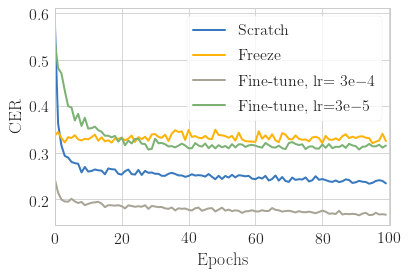

In [4]:
plt.figure()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for cers, name in zip([scratch_cers, freeze_cers, finetune_cers, lowerlr_cers], ['Scratch', 'Freeze',  'Fine-tune, lr$=3\mathrm{e}{-4}$', 'Fine-tune, lr=$3\mathrm{e}{-5}$']):
    print('{}: {}'.format(name, min(cers[1])))
    plt.plot(np.array(cers[1])/100, label=name)
plt.legend(frameon=True)
plt.ylabel('CER')
plt.xlabel('Epochs')
plt.xlim([0, 100.1])
plt.savefig('C:\\Users\\v-igquin\\Dropbox\\aes-lac-2018\\images\\exp1.pdf', dpi=300, bbox_inches='tight')
plt.show()